In [14]:
import matplotlib.pyplot as plt
import pandas as pd

pumkins = pd.read_csv("US-pumpkins.csv")
pumkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumkins = pumkins[pumkins["Package"].str.contains("bushel")]
pumkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
price = (pumkins["Low Price"] + pumkins["High Price"]) / 2
month = pd.DatetimeIndex(pumkins["Date"]).month
price

70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64

In [4]:
new_pumkins = pd.DataFrame({"Ciry": pumkins["City Name"], "Month": month, "Package": pumkins["Package"], "Low Price": pumkins["Low Price"], "High Price": pumkins["High Price"], "Price": price})
new_pumkins.loc[new_pumkins["Package"].str.contains("1 1/9"), "Price"] = price/(1+1/9) 
new_pumkins.loc[new_pumkins["Package"].str.contains("1/2"), "Price"] = price/(1/2) 

new_pumkins


,Ciry,Month,Package,Low Price,High Price,Price
70,BALTIMORE,9,1 1/9 bushel cartons,15.00,15.0,13.50
71,BALTIMORE,9,1 1/9 bushel cartons,18.00,18.0,16.20
72,BALTIMORE,10,1 1/9 bushel cartons,18.00,18.0,16.20
73,BALTIMORE,10,1 1/9 bushel cartons,17.00,17.0,15.30
74,BALTIMORE,10,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...,...
1738,ST. LOUIS,9,1/2 bushel cartons,15.00,15.0,30.00
1739,ST. LOUIS,9,1/2 bushel cartons,13.75,15.0,28.75
1740,ST. LOUIS,9,1/2 bushel cartons,10.75,15.0,25.75
1741,ST. LOUIS,9,1/2 bushel cartons,12.00,12.0,24.00


Text(0, 0.5, 'Pumpkin Price')

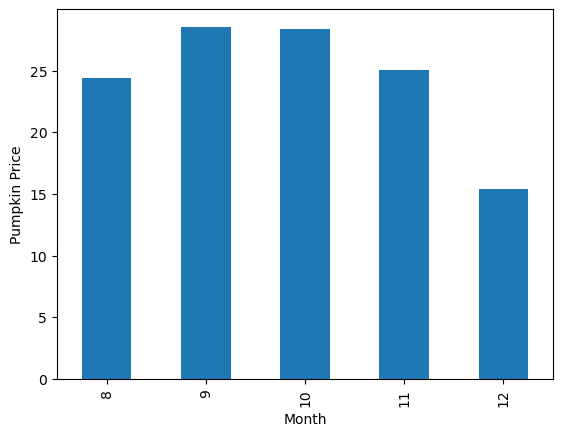

In [5]:
new_pumkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [6]:
from sklearn.preprocessing import LabelEncoder

new_pumkins.iloc[:, 0:-1] = new_pumkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)

/tmp/ipykernel_213400/4191532013.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_pumkins.iloc[:, 0:-1] = new_pumkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)


In [7]:
new_pumkins

,Ciry,Month,Package,Low Price,High Price,Price
70,1,1,0,5,3,13.50
71,1,1,0,10,7,16.20
72,1,2,0,10,7,16.20
73,1,2,0,9,6,15.30
74,1,2,0,5,3,13.50
...,...,...,...,...,...,...
1738,9,1,2,5,3,30.00
1739,9,1,2,3,3,28.75
1740,9,1,2,0,3,25.75
1741,9,1,2,1,0,24.00


In [8]:
print(new_pumkins.corr())

                Ciry     Month   Package  Low Price  High Price     Price
Ciry        1.000000 -0.188728  0.301604   0.172619    0.218157  0.323825
Month      -0.188728  1.000000 -0.144847  -0.002930   -0.028949 -0.149129
Package     0.301604 -0.144847  1.000000   0.320235    0.384265  0.608848
Low Price   0.172619 -0.002930  0.320235   1.000000    0.918809  0.320746
High Price  0.218157 -0.028949  0.384265   0.918809    1.000000  0.369732
Price       0.323825 -0.149129  0.608848   0.320746    0.369732  1.000000


In [9]:
new_pumkins.dropna(inplace=True)
new_pumkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ciry        415 non-null    int64  
 1   Month       415 non-null    int64  
 2   Package     415 non-null    int64  
 3   Low Price   415 non-null    int64  
 4   High Price  415 non-null    int64  
 5   Price       415 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 38.9 KB


In [10]:
new_columns = ["Package", "Price"]
lin_pumkins = new_pumkins.drop([c for c in new_pumkins.columns if c not in new_columns], axis='columns')

lin_pumkins

,Package,Price
70,0,13.50
71,0,16.20
72,0,16.20
73,0,15.30
74,0,13.50
...,...,...
1738,2,30.00
1739,2,28.75
1740,2,25.75
1741,2,24.00


In [11]:
X = lin_pumkins.values[:, :1]
y = lin_pumkins.values[:, 1:2]

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

# Predict the test data
pred = lin_reg.predict(X_test)

# Calculate accuracy
accuracy_score = lin_reg.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.3348784132038002


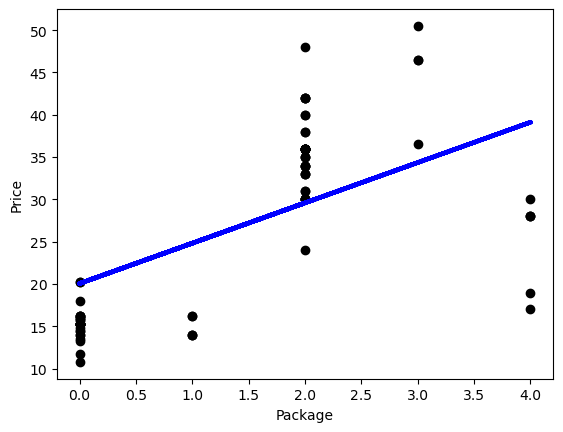

In [13]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.show()